<h1>Atividade 1 - Parte B – Reconhecimento de Imagens e Visão Computacional</h1>

Aluno: Aderson Lucas Guimarães Mendonça Medeiros<br>
Matrícula: 1831143043

1) Escreva um programa em que o limiar seja estimado automaticamente usando a técnica de Global Thresholding. A saída deve ser uma imagem binarizada e a entrada de ser a imagem fingerPrint.png. Qual a relação que existe entre o limiar e o número de iterações?

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Carregar imagem
image = cv2.imread('imagens/fingerPrint.png', cv2.IMREAD_GRAYSCALE)

In [47]:
def find_global_threshold(image_fgt, threshold_fgt, error_fgt):
    threshold_initial = threshold_fgt
    threshold_final = -1
    error = threshold_final - threshold_initial
    image_fgt_final = image_fgt.copy()
    i = 0
    while abs(error) > error_fgt:
        upper_class = image_fgt_final[image_fgt_final >= threshold_initial]
        lower_class = image_fgt_final[image_fgt_final < threshold_initial]
        upper_class_mean = 0 if upper_class.size == 0 else np.mean(upper_class)
        lower_class_mean = 0 if lower_class.size == 0 else np.mean(lower_class)    
        threshold_final = np.mean([upper_class_mean, lower_class_mean])
        error = threshold_final - threshold_initial
        threshold_initial = threshold_final
        i += 1
    print('threshold inicial:',threshold_initial)
    print('threshold final:',threshold_final)
    image_fgt_final[image_fgt_final < threshold_final] = 0
    image_fgt_final[image_fgt_final >= threshold_final] = 255
    return image_fgt_final, i

In [48]:
image_binary, iterations = find_global_threshold(image, np.mean(image), 0.5)
image_binary_compare, iterations_compare = find_global_threshold(image, 50.0, 0.5)

threshold inicial: 125.38601930911415
threshold final: 125.38601930911415
threshold inicial: 125.38601930911415
threshold final: 125.38601930911415


In [49]:
# Mostra a imagem obtida com chute inicial para o limiar de decisão igual a média dos pixels da imagem
cv2.imshow('image', image_binary)
cv2.waitKey()
# Obteve-se uma quantidade de iterações igual a 2
print(iterations)

2


In [50]:
# Mostra a imagem obtida com chute inicial para o limiar de decisão igual a 50
cv2.imshow('image', image_binary_compare)
cv2.waitKey()
# Obteve-se uma quantidade de iterações igual a 4
print(iterations_compare)

4


(array([ 32922., 167900.,  56406.,  31988.,   2230.,   5096.,  43282.,
         88022., 324050.,  12588.]),
 array([ 29. ,  48.5,  68. ,  87.5, 107. , 126.5, 146. , 165.5, 185. ,
        204.5, 224. ]),
 <a list of 10 Patch objects>)

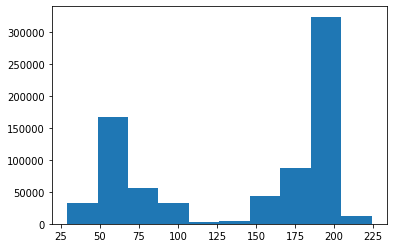

In [51]:
# Histograma para distribuição da intensidade dos pixels
plt.hist(image.flatten())

É possível observar que o chute inicial igual à media dos pixels está mais próximo do divisor final, enquanto o valor de 50 está mais distante.

Resposta: A relação entre o limiar de decisão e a quantidade de iterações é bastante forte, pois dependendo do chute inicial que é dado para o limiar o algoritmo pode convergir de forma muito lenta para o valor global ótimo. Dessa forma, é possível afirmar a relaçao diretamente positiva entre esses dois valores, ou seja, quanto maior o erro no chute inicial maior a quantidade de iterações se torna.

2) A imagem abaixo possui círculos e quadrados de vários tamanhos. Alguns objetos possuem um ou dois buracos dentro deles. Faça um algoritmo que use operações morfológicas e lógicas para responder as perguntas abaixo. 

In [52]:
# Carrega a imagem e normaliza para um intervalo entre 0 e 1
image_shapes = cv2.imread('imagens/blocks.png', cv2.IMREAD_GRAYSCALE)
# image_shapes = (image_shapes - np.min(image_shapes))/(np.max(image_shapes) - np.min(image_shapes))
thresh, im_binary = cv2.threshold(image_shapes.copy(), 128, 255, cv2.THRESH_BINARY)

In [53]:
# Show image
cv2.imshow('image', im_binary)
cv2.waitKey()

-1

(a)Que fração dos pixels da imagem são brancos? Quantos objetos a imagem possui? 

In [54]:
# Calcula a proporção de pixels brancos contando o total de pixel brancos e pretos
fracao_branco = np.unique(im_binary, return_counts=True)[1][1]/im_binary.size
print('O percentual de pixels brancos na imagem é: {:.2f}%'.format(100*fracao_branco))

O percentual de pixels brancos na imagem é: 21.25%


In [55]:
# Obter os contornos das formas encontradas e a hierarquia entre os contornos obtidos
contorno, hierarquia = cv2.findContours(im_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarquia = hierarquia.reshape(-1,4)

In [56]:
# Utilizando a hierarquia que retorna os respectivamte o indice da contorno seguinte, o indice do contorno anterior,
# o indice do primeiro filho e o indice do contorno pai. Quando inexistirem o valor padrão é 0.
print('Array de hierarquia do primeiro objeto :', hierarquia[0],'\n')
print('Array de hierarquia do segundo objeto :', hierarquia[1],'\n')

Array de hierarquia do primeiro objeto : [ 1 -1 -1 -1] 

Array de hierarquia do segundo objeto : [ 2  0 -1 -1] 



In [57]:
# Contar todos os contornos com indice de pai -1, ou seja, objetos sem pai.
total_objetos = np.unique([objeto[-1] for objeto in hierarquia if objeto[-1] == -1], return_counts=True)
contagem_objetos = total_objetos[1]
print('Foram encontrados {} objetos.'.format(contagem_objetos[0]))

Foram encontrados 27 objetos.


(b)Quantos buracos há na imagem? Quantos objetos têm mais de um buraco? 

In [58]:
# Contar todos os contornos com indice de pai diferente de -1, ou seja, objetos com pai.
total_objetos = np.unique([objeto[-1] for objeto in hierarquia if objeto[-1] != -1], return_counts=True)
contagem_objetos = total_objetos[1]
print('Foram encontrados {} objetos.'.format(np.sum(contagem_objetos)))

Foram encontrados 10 objetos.


In [59]:
# Contar todos os contornos com indice de pai diferente de -1 e com o mesmo pai, ou seja, objetos diferentes
# com mesmo pai.
total_objetos = np.unique([objeto[-1] for objeto in hierarquia if objeto[-1] != -1], return_counts=True)
contagem_objetos = np.unique(total_objetos[1], return_counts=True)
print('Foram encontrados {} objetos.'.format(contagem_objetos[1][1]))

Foram encontrados 4 objetos.
